# EL universal Scrapper

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import lxml
from tqdm import tqdm

In [16]:
url = 'https://www.eluniversal.com.mx'
universal = requests.get(url)

In [17]:
universal.status_code

200

In [18]:
universal.headers

{'Date': 'Sat, 05 Dec 2020 04:11:26 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d75d80c0edb0e5fb10592e1483075f5e91607141486; expires=Mon, 04-Jan-21 04:11:26 GMT; path=/; domain=.eluniversal.com.mx; HttpOnly; SameSite=Lax; Secure, __cfruid=273c78c6907c186e685e8044d63df2c19bc02caf-1607141486; path=/; domain=.eluniversal.com.mx; HttpOnly; Secure; SameSite=None', 'X-Content-Type-Options': 'nosniff', 'X-Powered-By': 'PHP/5.6.40', 'X-Drupal-Cache': 'HIT', 'Content-Language': 'es', 'X-Frame-Options': 'SAMEORIGIN', 'X-Generator': 'Drupal 7 (http://drupal.org)', 'Link': '<http://www.eluniversal.com.mx/sites/all/themes/universal/images/default600x315px.jpg>; rel="image_src",<https://www.eluniversal.com.mx/>; rel="canonical",<https://www.eluniversal.com.mx/>; rel="shortlink"', 'Cache-Control': 'public, max-age=300', 'Last-Modified': 'Sat, 05 Dec 2020 04:06:27 GMT', 'Expires': 'Sat, 05 Dec 2020 04:16:26 GMT',

In [19]:
universal.request.headers

{'User-Agent': 'python-requests/2.25.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [20]:
soup = BeautifulSoup(universal.text, 'html.parser')

In [21]:
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:og="http://ogp.me/ns#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:video="http://ogp.me/ns/video#">\n <head profile="http://www.w3.org/1999/xhtml/vocab">\n  <meta content="on" http-equiv="x-dns-prefetch-control"/>\n  <meta content="163316950407128" property="fb:app_id"/>\n  <link href="https://fonts.googleapis.com&amp;display=swap" rel="preload"/>\n  <link href="https://fonts.gstatic.com&amp;display=swap" rel="preload"/>\n  <link crossorigin="" href="https://use.fontawesome.com/" rel="preconnect"/>\n  <link href="https://use.fontawesome.com/" rel="dns-prefetch"/>\n  <link crossorigin="" href="https://connect.facebook.net/" rel="preconnect"/>\n  <link href="https://connect.facebook.net/" rel="dns-prefet

In [22]:
nav_bar = soup.find('ul', attrs={'class':'links inline'}).find_all('li')
nav_bar

[<li class="listado"><a href="/minuto-x-minuto">MxM</a></li>,
 <li class="listado"><a href="/videos">Videos</a></li>,
 <li class="listado"><a href="/galerias" rel="nofollow">Fotos</a></li>,
 <li class="listado"><a href="/especiales">Especiales</a></li>]

In [23]:
nav_bar_MXM = nav_bar[0]
nav_bar_MXM

<li class="listado"><a href="/minuto-x-minuto">MxM</a></li>

In [24]:
nav_bar_MXM.a.get_text()

'MxM'

In [25]:
nav_bar_MXM_link = nav_bar_MXM.a.get('href')
nav_bar_MXM_link

'/minuto-x-minuto'

In [26]:
#list comprenhension
link_nav_bar = [url + link_nvbar.a.get('href') for link_nvbar in nav_bar]
link_nav_bar

['https://www.eluniversal.com.mx/minuto-x-minuto',
 'https://www.eluniversal.com.mx/videos',
 'https://www.eluniversal.com.mx/galerias',
 'https://www.eluniversal.com.mx/especiales']

### Obteniendo listado de notas

In [29]:
minuto_minuto = requests.get(link_nav_bar[0])
minuto_minuto

<Response [200]>

In [32]:
soup_mxm = BeautifulSoup(minuto_minuto.text, 'html.parser')
print(soup_mxm.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:og="http://ogp.me/ns#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:video="http://ogp.me/ns/video#">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="163316950407128" property="fb:app_id"/>
  <link href="https://fonts.googleapis.com&amp;display=swap" rel="preload"/>
  <link href="https://fonts.gstatic.com&amp;display=swap" rel="preload"/>
  <!--[if IE]><![endif]-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="https://www.eluniversal.com.mx/sites/all/themes/eluniversal/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <meta content="" name="cXenseParse:url"/>
  <meta con

In [33]:
article_list = soup_mxm.find('div', attrs={'class':'view-content'})
article_list

<div class="view-content">
<article class="ce9-Tipo3MinxMin">
<div class="ce9-Tipo3MinxMin_Contenedor1">
<div class="ce9-Tipo3MinxMin_ContenedorReloj">
<div class="ce9-Tipo3MinxMin_Reloj">
<span class="far fa-clock"></span>
</div>
<p class="ce9-Tipo3MinxMin_Hora">
21:53 </p>
</div>
</div>
<div class="ce9-Tipo3MinxMin_Texto">
<p class="ce9-Tipo3MinxMin_Seccion seccion-15"><a href="/deportes">Universal Deportes</a></p>
<h2 class="ce9-Tipo3MinxMin_Titulo"><a href="https://www.eluniversal.com.mx/universal-deportes/futbol/napoli-rebautiza-su-estadio-como-diego-armando-maradona">Napoli rebautiza su estadio como "Diego Armando Maradona"</a></h2>
</div>
</article>
<article class="ce9-Tipo3MinxMin">
<div class="ce9-Tipo3MinxMin_Contenedor1">
<div class="ce9-Tipo3MinxMin_ContenedorReloj">
<div class="ce9-Tipo3MinxMin_Reloj">
<span class="far fa-clock"></span>
</div>
<p class="ce9-Tipo3MinxMin_Hora">
21:49 </p>
</div>
</div>
<div class="ce9-Tipo3MinxMin_Texto">
<p class="ce9-Tipo3MinxMin_Seccion 

In [35]:
article_content = article_list.find_all('h2', attrs={'class':'ce9-Tipo3MinxMin_Titulo'})
article_a_href = [article_href.a.get('href') for article_href in article_content]
article_a_href

['https://www.eluniversal.com.mx/universal-deportes/futbol/napoli-rebautiza-su-estadio-como-diego-armando-maradona',
 'https://www.eluniversal.com.mx/nacion/protestan-comuneros-afuera-de-la-presa-santa-maria-durante-visita-de-amlo',
 'https://www.eluniversal.com.mx/estados/inician-expediente-por-caso-de-transfeminicidios-de-geovanna-y-sherlyn',
 'https://www.eluniversal.com.mx/mundo/gobierno-de-trump-impidio-equipo-de-biden-conocer-operaciones-de-espionaje-de-eu',
 'https://www.eluniversal.com.mx/mundo/gobierno-de-trump-impidio-equipo-de-biden-conocer-operaciones-de-espionaje-de-eu',
 'https://www.eluniversal.com.mx/estados/arranca-construccion-de-edificio-del-consulado-norteamericano-en-yucatan',
 'https://www.eluniversal.com.mx/estados/decomisan-450-kilos-de-pirotecnia-en-celaya',
 'https://www.eluniversal.com.mx/universal-deportes/futbol/liga-mx-los-pumas-se-refugian-en-la-prensa-amiga',
 'https://www.eluniversal.com.mx/estados/dan-premio-el-profe-de-la-combi-por-ayudar-que-ninos-si

In [36]:
url1_nota = article_a_href[0]
url1_nota

'https://www.eluniversal.com.mx/universal-deportes/futbol/napoli-rebautiza-su-estadio-como-diego-armando-maradona'

In [44]:
try:
    nota = requests.get(url1_nota)
    if nota.status_code == 200:
        s_note = BeautifulSoup(nota.text, 'html.parser')
        #Exraemos el titulo
        titulo = s.find('h1', attrs={'class':'h1'})
        print(titulo.get_text())
        #Extraemos subtitulo
        subtitle = s.find('h2', attrs={'class':'h2'})
        print(subtitle.get_text())
        #extraemos fecha
        fecha = s.find('span', attrs={'class':'ce12-DatosArticulo_ElementoFecha'})
        print(fecha.text)
    else:
        print('but')
except Exception as e:
    print(f'Se genero el siguiente error: {e}')

Napoli rebautiza su estadio como "Diego Armando Maradona"
El estadio San Paolo del Napoli ya es oficialmente el "Diego Armando Maradona"
 04/12/2020


In [82]:
cuerpo = s_note.find('div', attrs={'class':'field field-name-body field-type-text-with-summary field-label-hidden'})
cuerpo_texto = cuerpo.find('p').text
cuerpo_texto

'El estadio San Paolo del Napoli ya es oficialmente el "Diego Armando Maradona", tras aprobarse este viernes el cambio de nombre por unanimidad en el Ayuntamiento de esta ciudad del sur de Italia en honor de su legendario número 10, fallecido el pasado 25 de noviembre, según ha anunciado la institución.\xa0'

In [83]:
image_container = s_note.find('figure', attrs={'class':'contenedor-ImagenArticulo'})

In [94]:
image = image_container.find('img')
image

<img alt='Napoli rebautiza su estadio como "Diego Armando Maradona"' src="https://www.eluniversal.com.mx/sites/default/files/2020/12/04/estadio_maradona.jpg"/>

In [85]:
image_url = image.get('src')
image_url

'https://www.eluniversal.com.mx/sites/default/files/2020/12/04/estadio_maradona.jpg'

In [86]:
image_url_request = requests.get(image_url)
image_url_request.status_code

200

In [87]:
from IPython.display import Image

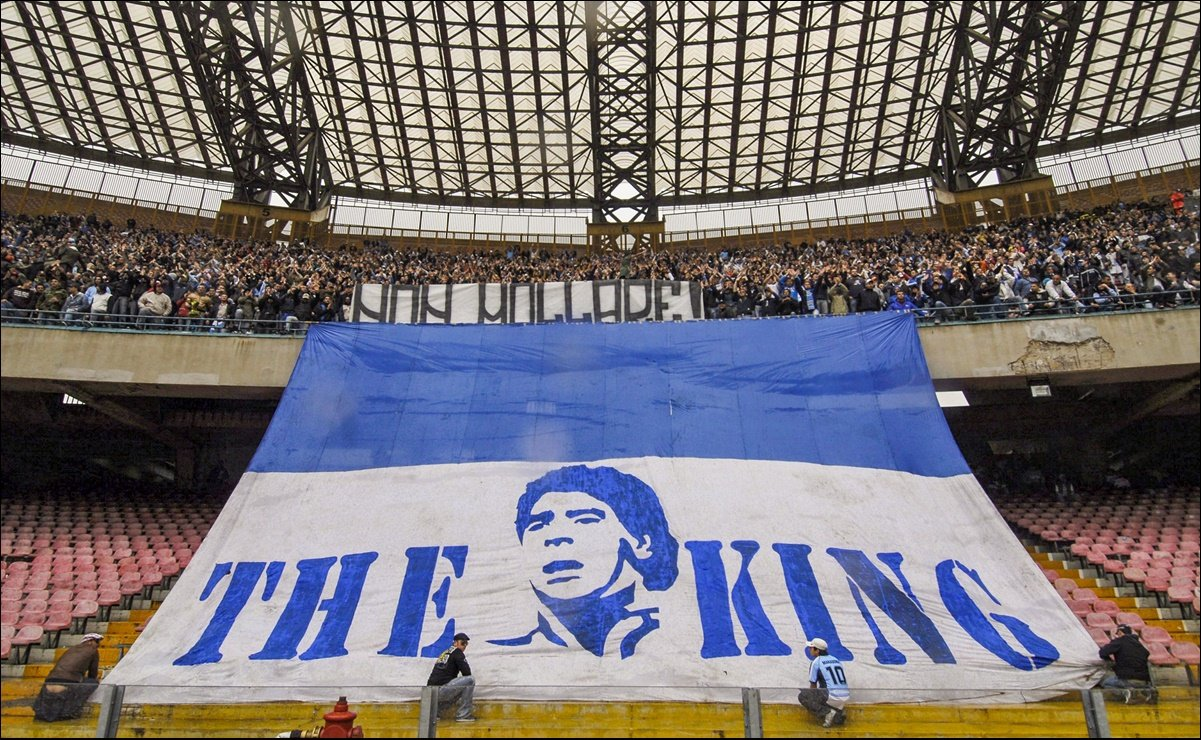

In [88]:
Image(image_url_request.content)

In [95]:
def obtener_info_nota(soup_nota):
    ret_dict = {}
    
    #Exraemos el titulo
    titulo = soup_nota.find('h1', attrs={'class':'h1'})
    if titulo:
        ret_dict['titulo'] = titulo.get_text()
    else:
        ret_dict['titulo'] = None
    #Extraemos subtitulo
    subtitle = soup_nota.find('h2', attrs={'class':'h2'})
    if subtitle:
        ret_dict['subtitle'] = subtitle.get_text()
    else:
        ret_dict['subtitle'] = None
    #extraemos fecha
    fecha = soup_nota.find('span', attrs={'class':'ce12-DatosArticulo_ElementoFecha'})
    if fecha:
        ret_dict['fecha'] = fecha.text
    else:
        ret_dict['fecha'] = None
    
    #Extraemos la img
    image_container = soup_nota.find('figure', attrs={'class':'contenedor-ImagenArticulo'})
    if image_container:
        image = image_container.find('img')
        image_url = image.get('src')
        try:
            image_url_request = requests.get(image_url)
            if image_url_request == 200:
                ret_dict['imagen'] = image_url_request.content
            else:
                ret_dict['imagen'] = None
        except:
            print('No se pudo obtener la imagen')
    else:
        print('No se encontro media')
    #Extraemos cuerpo de la nota
    cuerpo = soup_nota.find('div', attrs={'class':'field field-name-body field-type-text-with-summary field-label-hidden'})
    cuerpo_texto = cuerpo.find('p')
    if cuerpo_texto:
        ret_dict['cuerpo'] = cuerpo_texto.text
    else:
        ret_dict['cuerpo'] = None
    return ret_dict

In [96]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e:
        print(f'Error escrapeando la URL {e}')
        return None
    
    if nota.status_code != 200:
        print(f'Error obteniendo nota {e}')
        print(f'Status code: {nota.status_code}')
        return None
    
    s_nota = BeautifulSoup(nota.text, 'html.parser')
    ret_dict = obtener_info_nota(s_nota)
    ret_dict['url'] = url
    
    return ret_dict

In [97]:
url1_nota

'https://www.eluniversal.com.mx/universal-deportes/futbol/napoli-rebautiza-su-estadio-como-diego-armando-maradona'

In [98]:
scrape_nota(url1_nota)

{'titulo': 'Napoli rebautiza su estadio como "Diego Armando Maradona"',
 'subtitle': 'El estadio San Paolo del Napoli ya es oficialmente el "Diego Armando Maradona"',
 'fecha': ' 04/12/2020',
 'imagen': None,
 'cuerpo': 'El estadio San Paolo del Napoli ya es oficialmente el "Diego Armando Maradona", tras aprobarse este viernes el cambio de nombre por unanimidad en el Ayuntamiento de esta ciudad del sur de Italia en honor de su legendario número 10, fallecido el pasado 25 de noviembre, según ha anunciado la institución.\xa0',
 'url': 'https://www.eluniversal.com.mx/universal-deportes/futbol/napoli-rebautiza-su-estadio-como-diego-armando-maradona'}